<center>

![](https://drive.google.com/uc?export=view&id=1R6EAVE0Ysym-UNtZR-Ze_HcqQLDmH0bd)
<p>
College: Engineering and Information Technology <br>
Department: Information Technology <br>
Program: Data Analytics <br>

Academic semester: Spring 2023 - 2024 <br>

Data Visualization course Project<br>

Cars Sales Analysis <br>

Prepared by: <br>
Amnah Khalid - 202210779 <br>
Lubna Sher Aslam - 202120102 <br>
Al-Anood Tawfeeq Mohsen Al-Sowaidi - 202211607 <br>
Huda Mohammed Bilal - 202211270 <br>

Supervised by: <br>
Dr. Salam Fraihat <br>
</p></center>

# Introduction

This project involves analysing the sales of cars, but focusing mostly on the Visualization aspect. Our Car Sales dataset is a stimulative dataset.  Our main goal for this project is to:

1. Understand and analyze the common trends and analysis for sales.
2. Understand and evaluate our customers behaviours.
3. Predict different car body styles that our customers prefer.

We will begin by examining and understanding the attributes of our data, and then performing basic cleaning operations on our data. We will further perform gender analysis, and inspect the plots obtained. We wil also analyze the top 10 dealers, the dealer region and the features of the cars. We will perform Customer Segmentation to understand our data better, by using K-Means ML algorithm. We have also used ML algorithms like KNN and Decision Tree to predict the Body Styles our Customers prefer.

# Importing the Libraries

In [ ]:
pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px
import seaborn as sb
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import category_encoders as ce
from wordcloud import WordCloud
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

For performing any operations on a data, some important libraries need to be imported and installed.

# Meta Data and Dataset Description

In [ ]:
mydata = pd.read_csv("Car Sales.xlsx - car_data.csv")  #Importing the dataset and storing it in 'mydata'
mydata.head()

Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000  60504-7114   
2          Overhead Camshaft       Manual         Red      31500  38701-8047   
3          Overhead Camshaft       Manual  Pale White      14000  99301-3882   
4  DoubleÂ Overhead Camshaft         Auto         Red      24500  53546-9427   

  Body Style    Phone Dealer_Region  
0        SUV  8264678    Middletown  
1        SUV  6848189        Aurora  
2  Passenger  7298798    Greenville  
3        SUV  6257557         Pasco  
4  Hatchback  7081483    Janesville

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
mydata.describe(include='object').T

count unique                                              top  \
Car_id         23906  23906                                     C_CND_000001   
Date           23906    612                                         9/5/2023   
Customer Name  23905   3021                                           Thomas   
Gender         23906      2                                             Male   
Dealer_Name    23906     28  Progressive Shippers Cooperative Association No   
Company        23906     30                                        Chevrolet   
Model          23906    154                                         Diamante   
Engine         23906      2                        DoubleÂ Overhead Camshaft   
Transmission   23906      2                                             Auto   
Color          23906      3                                       Pale White   
Dealer_No      23906      7                                       85257-3102   
Body Style     23906      5                                              SUV   
Dealer_Region  23906      7                                           Austin   

                freq  
Car_id             1  
Date             190  
Customer Name     92  
Gender         18798  
Dealer_Name     1318  
Company         1819  
Model            418  
Engine         12571  
Transmission   12571  
Color          11256  
Dealer_No       3814  
Body Style      6374  
Dealer_Region   4135

Our dataset contains 23906 rows and 16 columns/features. Here is a description for each feature:


1.   Car_id - It is a unique ID given to each car, and this feature has 23906 unique values.
2.   Date -  It is the date the specific car was purchased by a customer. It has 612 unique values (dates).

3.   Customer Name - It is the name of the customer who purchased the car, and it has 3021 unique values. That means some customer bought more than one car or maybe they are different customers but with the same name. It has one missing value.
4.   Gender - It is the gender of the customer who purchased the car. It has 2 unique values - Male and Female.

5.   Annual Income - It is the yearly income of the customer who purchased the car. The currency is in dollars.

2.   Dealer_Name - It is the name of the dealer company that sold the car to the customer, and it has 28 unique values.

7.   Company - It is the brand of the car purchased, and it has 30 unique values.

2.   Model - It is the model of each car brand, and it has 154 unique values.

9.   Engine - It is the type of engine of the car. It has only 2 unique values - DoubleÂ Overhead Camshaft and Overhead Camshaft.

10.   Transmission - It is the type of gear the car has. It has 2 unique values - Auto and Manual.

11.   Color - It is the color of the car's exterior. It has 3 unique values - Black, Red and Pale White.
2.   Price ($) - It is the price of the car purchased. The currency is in dollars.

13.   Dealer_No - It is the unique dealer identification number associated with the sale. It has 7 unique values.
2.   Body Style - It is the design of the car's body. It has 5 unique values.

15.   Phone - It is the phone number associated with the sale, that is the dealer companies phone number.

2.   Dealer_Region - It is the location of the car dealer ( or the location from where the car was purchased from ), and it has 7 unique values.

















# Data Cleaning

Let's check if our data needs any cleaning.

In [ ]:
#Checking for missing values
mydata.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

We have found one missing value in the 'Customer Name' feature. Since it's only one value out of 23906 rows, it wont make much difference if we drop it. Also at the same time, the name is not unique in our case, and will not make any difference. So we will drop the Customer Name for the ML models. But for now let's drop the missing value using dropna() function.

In [ ]:
mydata = mydata.dropna()
mydata.isnull().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

As the sum of missing values in each feature is 0, that means we have successfully dropped the missing value.

In [ ]:
#Checking for any duplicate rows
mydata.duplicated().sum()

0

Fortunately, we don't have any duplicate rows.

Let's Check for Outliers and Skewness.

### Plot 1 -  Box Plots of Annual Income and Price ($)

In [ ]:
#Checking for outliers
fig1 = px.box(mydata, y = "Annual Income")
fig1.show()
fig2 = px.box(mydata, y = "Price ($)" )
fig2.show()

To check for outliers, we can plot a box plot for the features we want to check for. Any data points above the upper fence and below the lower fence is considered as an outlier. For Annual Income, our box plot looks clamped together because of extreme values. Even though it looks like we have high outliers for the Annual Income and Price, we cannot consider them as outliers, because we have different society income levels, so some customers can have really high income, and also some luxury cars can be extremely expensive. But for the sake of visualization, we will need to remove these high outliers.

In [ ]:
print("The shape of our dataset before removing outliers: ", mydata.shape)

The shape of our dataset before removing outliers:  (23905, 16)


In [ ]:
def remove_outliers(data, feature):
    d1 = data.describe()
    Q1 = d1[feature].loc["25%"]
    Q3 = d1[feature].loc["75%"]
    IQR = Q3 - Q1
    new_data = data[(data[feature] >= (Q1 - 1.5 * IQR)) & (data[feature] <= (Q3 + 1.5 * IQR))]
    return new_data

mydata = remove_outliers(mydata, "Annual Income")
mydata = remove_outliers(mydata, "Price ($)")

To remove outliers, we have created remove_outliers function, that takes in the dataset and the name of the feature as parameters. d1 is a dataframe containing the statiscial information of the data. Q1 will store the first quantile and Q3 will store the third quantile of the feature. IQR will store the difference between Q3 and Q1. The formula to calculate the lower limit is: Q1 - 1.5 * IQR, and the formula to calculate the upper limit is Q3 + 1.5 * 1QR. The user - defined function will return the dataset without containing the outliers. We have called the function twice, one for the "Annual Income", and the other for the "Price ($)", as these two are the only numeric features.

In [ ]:
print("The shape of our dataset after removing outliers: ", mydata.shape)
print("The skewness of Annual Income", mydata['Annual Income'].skew())
print("The skewness of Price ($)", mydata['Price ($)'].skew())

The shape of our dataset after removing outliers:  (21697, 16)
The skewness of Annual Income 0.4519031951875449
The skewness of Price ($) 0.8819563302517675


The skewness is the measure of asymmetry of our data. If the skewness value is negative, and more than -1, that means our distribution is negatively skewed, and we have lower outliers. If the value is positive, and more than 1, that means it is positively skewed and we have higher outliers. For the Income feature, our skewness value is 0.45, which indicates that it is slightly positively skewed. For the Price feature it is 0.88, indicating that it is moderately skewed.

### Plot 2 - Box Plots of Annual Income and Price ($) (after removing outliers)



In [ ]:
fig1 = px.box(mydata, y = "Annual Income")
fig1.show()
fig2 = px.box(mydata, y = "Price ($)" )
fig2.show()

While looking at the boxplot for "Annual Income" and "Price", you might question as to why can we still see some outliers even though we have removed them?

Even after removing the extreme outliers, we can see some outliers in the box plot. In our case, we are not considering these values as outliers, because as we mentioned, both income and price can have high values. For example, CEO of companies usually have higher incomes. Also, some modified or rare models of cars can be extremely expensive as well. So therefore, we will keep these values.

Overall we have a pretty clean dataset.

# Gender Analysis

Is there any difference between female customers compared to male customers?

In our dataset, we have the Gender feature which tells us about the gender of each customer. Let's evaluate this feature further and check how it is related to the other features and analyze if each gender behaves differently?

## Proportion of each Gender

### Plot 3 - Pie Chart of Gender

In [ ]:
count = dict(mydata["Gender"].value_counts())
fig = px.pie(values = count.values(), names = count.keys(), color_discrete_sequence = ['teal','magenta'])
fig.update_layout(title = 'Proportion of Genders')
fig.show()

For plotting a pie chart, we first stored the names as the keys and number of unique values as the values of the 'Gender' in a dictionary called count. We then plot it using plotly's pie function. We gave the values of the dictionary for the parameter values, and the keys of the dictionary for the parameter names. We gave the color Teal for males and magenta for females.

Pie Charts can be used to plot the proportion of each unique value in a feature. From the above chart, we can clearly see that the majority of our customers are male, ie. almost 78.5% of the customers are male and 21.5% are females. We can look at this from 2 different perspectives:

1.  It might be that the female customers data wasn't recorded fully in our dataset, which can explain why they are sigficantly less in number compared to the male customers.

2. It might actually be that there are in reality only 21.5% of female cutomers interested in buying cars. That tells that most females are less interested in buying cars. Or maybe they prefer depending on their fathers, husbands, etc. for purchasing cars.

## Comparison of the Annual Income and Car Price of each Gender

### Plot 4 - Scatter Plot of Annual Income and Price ($)

In [ ]:
st = px.scatter(mydata, x = "Annual Income", y = "Price ($)", color = "Gender", color_discrete_sequence = ['teal','magenta'])
st.show()

Scatter plots can be used to check if our features are correlated with each other or not. From the above scatter plot, we can  understand that there is no linear relationship between Annual Income and Price. This means that customers with any inccome either low or high tend to buy both expensive and affordable cars. But we can notice that males have higher income compared to females, but the prices of the cars they purchase are similar. It looks like, most of the customers are clustered around the income range between than 0.5M and 1M, and the car price less than 30K. Since the data points are very dense in some areas, we can analyze them using density heatmap which is a map similar to hexbin plot.

### Plot 5 - Density Heatmap of Annual Income and Price ($)

In [ ]:
fig = px.density_heatmap(mydata, y = "Price ($)" , x = 'Annual Income', nbinsx = 20, nbinsy = 20,  color_continuous_scale = "Blues")
fig.show()

In a density heatmap, the darker the square colors are, the denser the value is. Customers having salary from 10K till 200K tend to buy cars whose prices range between 15K to almost 25K. We also have another cluster of denser values, where customers having income in the range of 400K till 1M tend to buy cars whose prices range from 15K till 25K. So we can conclude that majority of the customers prefer to buy cars having prices between 15K to 25K.

### Plot 6 - Distribution of Annual Income (histogram)

In [ ]:
fig = px.histogram(mydata, x = "Annual Income", color = "Gender", marginal = "box", color_discrete_sequence = ['teal','magenta'])
fig.show()

To analyze the distribution of the Annual Income and Price  we are plotting a histogram using plotly. When you take a first glance at it, you might think that females are higher than males, but in reality the histogram is plotted in such a way that the count of females is stacked above the count of males. The distribution of the Annual Income is Bimodal, with 2 peaks, one at income betweem 10K - 50K, and the other between 600K to 650K. We can assume that the 2nd peak is positively skewed, meaning that lesser number of customers have higher income.

When we analyze the box plot for the 2 Genders, Male customers have higher income than females. When we seperate the female customers from the male customers, the box plots for each of them, specifically for females show many high outliers. This can be due to the fact that females are lesser in number and also they have less income when compared to the males. So the higher income for the males is considered as an outlier for females. But the starting (min) income for females is higher. The starting income for females is 13.5K, and for males is 10.08K. The median income of males, 735K, is also higher than the median of females which is 652.5K.

### Plot 7 - Distribution of Price ($) (Histogram)

In [ ]:
fig = px.histogram(mydata, x = "Price ($)", color = "Gender", marginal = "box", hover_data = mydata.columns, color_discrete_sequence = ['teal','magenta'])
fig.show()

The distribution of the Price feature is positively skewed, with the majority of the cutomers purchasing car b/w 22K to 22.5K. When we analyze the boxplot, there isn't much difference between the prices for the female and male customers. But as we hover over the boxplot, we can say that the male customer purchase cars whose prices are very slightly higher than the car's females purchase. As the median of the male customers is 22.001K and of the female customers is 22K. Also the starting price for male customer is 1450 dollars and for female customer is 1200 dollars.

## Preferences of Car Companies for each Gender

### Plot 8 - Treemap for Gender

In [ ]:
fig = px.treemap(mydata, path = ['Gender', 'Company','Transmission'], values = 'Price ($)')
fig.update_traces(root_color = "lightgrey")
fig.update_layout(treemapcolorway = ["teal", "magenta"])
fig.show()

Do Male and Female customers have different preferences of the car they want to purchase?

From the above treemap, we learn that males have purchased more cars as their car price value is also higher, but this also could be due to the fact that there are large number of male customers compared to the females. Both Male and Female customers prefer to buy Chevrolet in manual transmission mode. The top 3 Cars which Male customers have purchased is (cars they prefer):


1.   Chevrolet - Manual mode
2.   Ford - Manual mode
3.   Dodge - Auto mode

and the top 3 cars that female customers have purchased is:

1.  Chevrolot - Manual mode
2.  Dodge - Auto mode
3.  Ford - Auto mode


For Male customers, the least purchased car is Saab in Manual transmission mode. For female customers, the least purchased car is Jaguar in auto
transmission mode.

## Preferences of Dealer Companies for each Gender

### Plot 9 - Bar Chart for count of Dealers

In [ ]:
dealer_bar = mydata.groupby(['Dealer_Name', 'Gender']).size().reset_index(name='count')
fig = px.bar(dealer_bar, x = 'Dealer_Name', y = 'count', color = "Gender", color_discrete_sequence = ['magenta','teal'], barmode='stack', title = 'Count of Male and Female Customers for each Dealer')
fig.show()

We have 28 dealers, among which 10 are very popular compared to the rest 18 dealers. The top 10 dealers are:

1. Progressive Shippers Cooperative Association No    
2. Rabun Used Car Sales                               
3. Ryder Truck Rental and Leasing                     
4. Saab-Belle Dodge                                  
5. Star Enterprises Inc                               
6. Tri-State Mack Inc                                 
7. U-Haul CO                                          
8. Scrivener Performance Engineering                  
9. Race Car Help                                     
10. Suburban Ford                                    

When we compare between the male and female customers, Progressive Shippers and Star Enterprice Inc have higher number of male customers. Whereas, Ryder Truck Rental and Rabun Used Cars have higher number of Female customers. Which could tell us that most female customers prefer to rent or lease a car rather than buying it. Also Star Enterprice Inc which has the 2nd highest number of male customers, have the lowest number of female customers compared to the others in the top 10 dealers.

# Analysis on Top 10 Dealers

Based on Plot 10, we can see that we 2 groups of dealers. The top 10 dealers who have very high number of customers compared to the bottom 18 dealers. Let's do some analysis on those top 10 dealers.

In [ ]:
top10_dealers = mydata.groupby('Dealer_Name').size().nlargest(10).index
mydata_top10 = mydata[mydata['Dealer_Name'].isin(top10_dealers)]
mydata_top10['Date'] = pd.to_datetime(mydata_top10['Date'])
mydata_top10['Month'] = mydata_top10['Date'].dt.month
mydata_top10["Year"] = mydata_top10["Date"].dt.year
mydata_top10["Month_name"] = mydata_top10["Date"].dt.month_name()

In the above snippet of code, the top10_dealers, contain the names of all the top 10 dealers. Next, we are saving all the data related to these top 10 dealers in mydata_top_10. We need to convert the 'Date' feature in our dataset to an object of datetime[64], so that we can extract the date information from it and plot time series and heatmaps for the data. After converting, we have stored the month, year and the name of the month for the respective rows, in the 'Month', 'Year', and the 'Month_name' feature.

### Plot 10 -  Clustermap for Price ($)

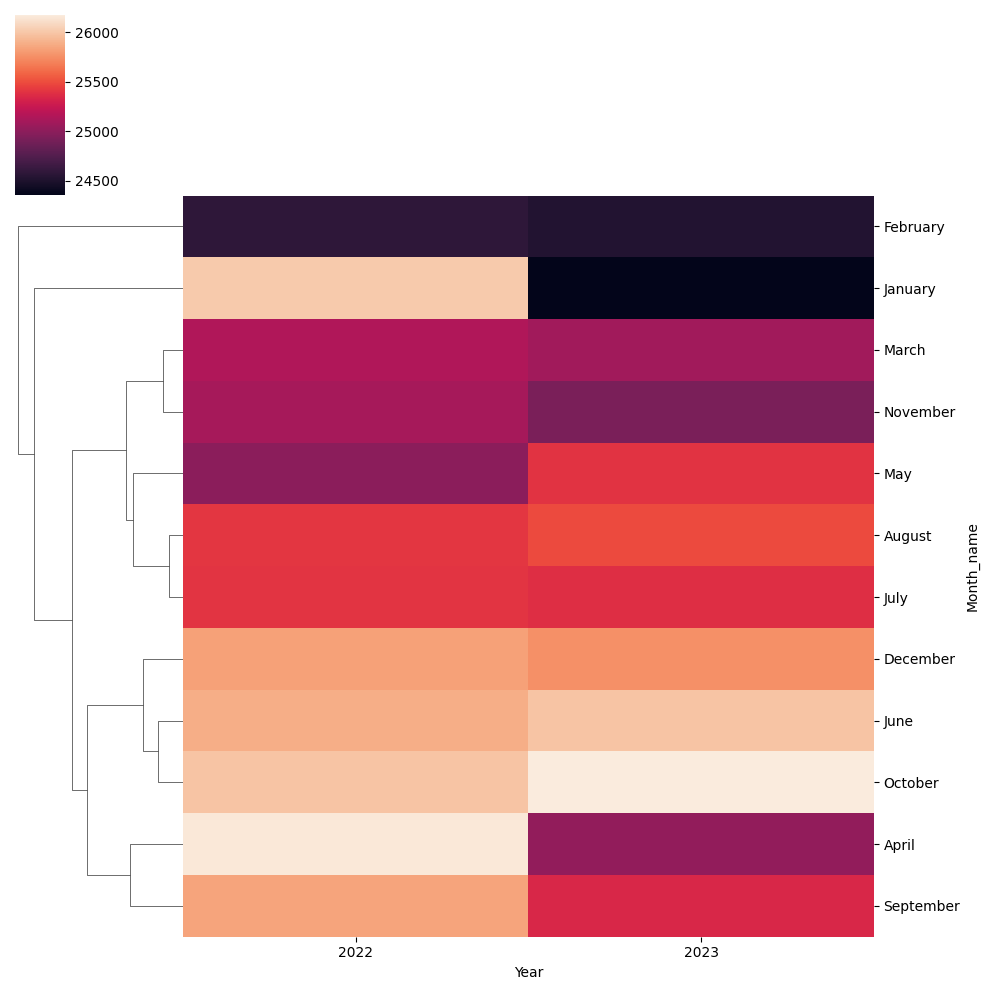

In [ ]:
mdata = mydata_top10.pivot_table("Price ($)", "Month_name", "Year")
sns.clustermap(mdata, col_cluster = False)

mdata is a pivot table, containing the total price for each month, for each year. Cluster Maps, are used to analyze hidden patterns and display the grouped values together, and clustering them either by rows, or by columns, or both. We have clustered it based on rows, and we have the default Euclidean distance to cluster them together.

*   For the year 2022, January and April had the highest sales for the top 10
dealers. Whereas, February had the lowest sales.

*   For the year 2023, October and June had the highest sales for the top 10 dealers, January and February had the lowest sales.

*   For both 2022 and 2023, the clustermap will take in account the distance between each month for each/both years. It will the measure the euclidean distance, and cluster the values with the least distance together. As we can see, December, June and October had the highest sales for both the years, therefore, they were grouped together. But you might wonder as to why was January not grouped with them ? This is because, January in 2023 had extremely low sales. Therefore, it was grouped with February, which had the lowest sales for both 2022 and 2023.

For analysis simplicity, we chose the top 5 dealers rather than the top 10 dealers to be able to plot understandable and readable line charts/time series.

In [ ]:
top5_dealers = mydata.groupby('Dealer_Name').size().nlargest(5).index
mydata_top5 = mydata[mydata['Dealer_Name'].isin(top5_dealers)]
mydata_top5['Date'] = pd.to_datetime(mydata_top5['Date'])
mydata_top5['Month'] = mydata_top5['Date'].dt.month
mydata_top5["Year"] = mydata_top5["Date"].dt.year
mydata_top5["Month_name"] = mydata_top5["Date"].dt.month_name()

Just as how we created a new dataframe, mydata_top10, for the top 10 dealers. We are creating a similar dataframe, mydata_top5, for the top 5 dealers.

### Plot 11 - Line Chart for Price ($) for Top 5 Dealers (Total Sales)

In [ ]:
t = pd.DataFrame(mydata_top5.groupby(['Dealer_Name', 'Date', 'Month'])['Price ($)'].sum().reset_index())
t_data = t.groupby(['Dealer_Name', 'Month'])['Price ($)'].sum().reset_index()

fig = px.line(t_data, x = 'Month', y = 'Price ($)', color = 'Dealer_Name', title = 'Total Sales($) for each Month', )
fig.update_xaxes(tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ticktext=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
fig.show()

To be able to plot the time series, we first created a data frame called t. t has 4 features, the 'Dealer_name', 'Date', 'Month', and the 'Price'. For each day, the price is summed together and grouped based on the dealer_name and month. t_data stores total sales of each month for each dealer name.

From the plot 12, we can observe that, For January and February, there was comparatively low total sale. but gradually the sales started rising till June, and then there was a slight drop for July and August. All of a suddden, the total sales plummeted for September and then dropped again for October. It started increasing rapidly again for November and December. December recorded the highest total sales for all the top 5 dealers.

Progressing Shipers had the highest sales compared to the other 4 shippers for both January and December, but throughout it had its own ups and downs.

### Plot 12 - Line Chart for Price ($) for Top 5 Dealers (Avg Sales)

In [ ]:
t = pd.DataFrame(mydata_top5.groupby(['Dealer_Name', 'Date', 'Month'])['Price ($)'].sum().reset_index())
t_data = t.groupby(['Dealer_Name', 'Month'])['Price ($)'].mean().reset_index()

fig = px.line(t_data, x = 'Month', y = 'Price ($)', color = 'Dealer_Name', title = 'Average Sales($) for each Month', )
fig.update_xaxes(tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ticktext=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
fig.show()

(One of the benefits of line charts, is that we can select which dealer we want display and analyze independently, or we can compare all the dealers together.)

For Plot 13, we are plotting the average sales for each month for the top 5 dealers. Although the patterns are approximately same compared to the total sales for each month (Plot 12), we can spot some slight variations for each dealer. For the sake of keeping it short, let's discuss the journey of the 1st  and the 5th from the top 5 dealers.


1. First Highest Dealer - Progressive Shippers Cooperative Association No    

   *   For January, Progressive Shippers had the 2nd lowest average sales. Gradually, it increased and when compared to the other 4, it was the top 1 dealer in March. Again it had a slight decrease till May. It then gradually and uniformly increased till August, where it was the top 1 dealer. And then there was a sudden increase for September. There was a huge drop in October, and then again a sudden increase in November till December.

   *  Overall, it had the highest average sales in December, and the lowest in January.

2. 5 Highest Dealer - Star Enterprises Inc                                
   
   *  Star Enterprises Inc., had the 2nd highest average sales in January, which was also its only highest position compared to the other months. For almost all the other months, it maintained bottom 3 position.



# Dealer Region Analysis

In our dataset, we have the feature 'Dealer_Region', it represents the region in which the dealer is stated in. We have in total 7 unique regions. Each region is a city in one of the states of US.

### Plot 13 - Pie Chart for Dealer Region

In [ ]:
count = dict(mydata["Dealer_Region"].value_counts())
fig = px.pie(values = count.values(), names = count.keys(), color_discrete_sequence = px.colors.qualitative.Set2)
fig.update_layout(title = 'Proportion of Dealer Regions')
fig.show()

In Plot 14, we have plotted a pie chart to check the proportion of dealer regions. According to the pie chart, Austin has the highest proportion of customers (3753) who purchase from the car dealers within the city, and Aurora (2813) had the lowest. But there isn't much difference between each dealer region. As the highest is 17.3% and the lowest is 13%. We can say that the unique values are almost properly sampled.

### Plot 14 - Box Plot for Annual Income for each Region

In [ ]:
fig = px.box(mydata, x = 'Dealer_Region', y = 'Annual Income', color = 'Dealer_Region', title='Annual Income Distribution by Dealer Region', color_discrete_sequence = px.colors.qualitative.Set2 )
fig.show()

Let's analyze the Annual Income for each region using box plots.

*  The customers who purchase from dealers stated in Pasco, have comparatively higher income than the rest of the customers. Also Pasco had comparatively lower count of customers (13.1%) when we looked at Plot 13. But when we compare the minimum income or the lower fence and the upper fence of Pasco with the rest of the regions, it has the lowest min income (10.08K) and at the same time the highest upper fence (2.268M). That means that Pasco has a diverse range of customers with different income backgrounds.

*  The customers who purchase from dealers stated in Austin, have comparatively lower income than the rest of the customers, as its upper fence(2.15M) is the lowest and median (710K) is the second lowest compared to the other regions. This is quite interesting, as the region Austin had the highest proportion of customers.

The above observations makes sense, because in reality the more cheaper/lower the price of an item is, the larger the number of people who purchase it. Whereas, the higher the price of an item is, the lower the number of people who purchase it.

### Plot 15 - Bar Chart for Price ($) for each region

In [ ]:
d_i = pd.DataFrame(mydata.groupby(['Dealer_Region'])['Price ($)'].sum()).reset_index()
fig = px.bar(d_i, x = 'Dealer_Region', y = 'Price ($)', color = "Dealer_Region", title = 'Total Sales')
fig.show()

### Plot 16 - Box Plot for Price ($) for each Region

In [ ]:
fig = px.box(mydata, x = 'Dealer_Region', y = 'Price ($)', color = 'Dealer_Region', title='Sales Distribution by Dealer Region', color_discrete_sequence = px.colors.qualitative.Set2)
fig.show()

These are some of the analysis we concluded from Plot 16, 15, 14, and 13.


1.  Middletown

    * One of the regions which had slightly lower than the average number of customers.
    *  For income, it had the lowest median, but at the same time the highest Q1. So it's starting range of incomes was comparatively higher.
    *  But looking at the sales distribution, Middletown is in the bottom 3 region who made the lowest sales.
     

2.  Aurora

    *  Aurora had the lowest number of customers.
    *  For income, it had the 2nd highest median, and 75% of the customers had salaries lower than 1.115M. But it had the lowest maximum income (2.35M).
    *  For sales, the starting value this region made is 9000. Which is also the highest starting value. But it made the lowest total sales.

3.  Greenville

    *  Greenville had the 2nd lowest number of customers.
    *  For income, 75% of the customers had income below 1.1M.
    *  For sales, it is placed in the bottom 2nd.

4.  Pasco

    *  Pasco had the 3rd lowest number of customers.
    *  Majority of the customers had higher income, but this region also had customers from comparatively lower range as well.
    *  For sales, it is placed in the top 4. As we can see from the box plot (Plot 16), the Sale's range is higher compared to the other regions. As the min sales this region made is 9000.

5. Janesville

    *  Janesville had the 2nd highest number of customers.
    *  It had a moderate range of income of customers. but 75% of the customers had slightly lower compared to the other regions.
    *  For sales, it is placed in the top 2. It's starting sales range (4300) was the 2nd highest.

5. Scottsdale

    *  Scottsdale had the 3rd highest number of customers.
    *  It also had a moderate range of income of customers. But it had the 2nd lowest median, which tells us that 50% of the customers had very slightly lower income.
    *  For Sales, it is placed in the top 3. It had the 2nd lowest starting range of sales (1450).

6. Austin
    *  Austin had the highest number of customers.
    *  Unlike the other regions, this region does'nt have customer with really high range of salaries, as 75% of it's customers had income below 1.07M.
    *  For Sales, it is the region which made the highest amount of sales. Which makes sense because it also had the highest number of customers.

 What we have noticed is that, the higher the number of customers, the higher is the total amount of sales, but lower is the range of income of the customers.

### Plot 17 -  Treemap for Dealer Region

In [ ]:
fig = px.treemap(mydata, path = ["Dealer_Region", "Dealer_Name"], values = "Price ($)", color_discrete_sequence = px.colors.qualitative.Set2)
fig.show()

Some dealer companies have branches in not just one region. and this can be proven by looking at the above treemap. Let's analyze this region by region.

1.  Austin

    *  The top Dealer is:
       1.  U-Haul CO
    
    *  The Bottom Dealer is:
       1.  Iceberg Rentals


2.  Janesville

    *  The top Dealer is:
       1.  Progressive Shippers Cooperative Association No
    
    *  The Bottom Dealer is:
       1.  Nebo Chevrolet

3.  Scottsdale

    *  The top Dealer is:
       1.  Rabun Used Car Sales
    
    *  The Bottom Dealer is:
       1.  Chrysler Plymoth

4.  Aurora

    *  The top Dealer is:
       1.  Saab Belle Dodge
    
    *  The Bottom Dealer is:
       1.  Clay Johnson Auto Sales


5.  Greenville

    *  The top Dealer is:
       1.  Scrivener Performance Engineering
    
    *  The Bottom Dealer is:
       1.  Diehl Motor CO Inc


6.  Pasco

    *  The top Dealer is:
       1.  Star Enterprise Inc
    
    *  The Bottom Dealer is:
       1.  Motor Vehicle Branch Office


7.  Middletown

    *  The top Dealer is:
       1.  Ryder Truck Rental and Leasing
    
    *  The Bottom Dealer is:
       1.  Hatfield Volkswagen


Chrysler Plymoth made the least sales for the region Scottsdale and 2nd least for Austin, but it was the 4th dealer who made the highest sales for Janesville. For Janesville, Nebo Chevrolet made the lowest sales, but for Middletown it made the 3rd Highest Sales.

Which tells us that, a dealer company might be really popular in one region, but in the other regions it might be the least popular.

In [ ]:
date_data = mydata
date_data['Date'] = pd.to_datetime(mydata['Date'])
date_data = date_data.set_index('Date')
date_data['Month'] = date_data.index.month
date_data['Year'] = date_data.index.year
date_data['day'] = date_data.index.day_of_week

Just as how we created a new dataframe, mydata_top10, for the top 10 dealers. We are creating a similar dataframe, date_data, to analyze the sales for each region.

### Plot 18 - Line Chart for Dealer Region (Monthly Avg Sales)

In [ ]:
t = pd.DataFrame(date_data.groupby(['Dealer_Region', 'Date', 'Month'])['Price ($)'].sum().reset_index())
t_data = t.groupby(['Dealer_Region', 'Month'])['Price ($)'].mean().reset_index()

fig = px.line(t_data, x = 'Month', y = 'Price ($)', color = 'Dealer_Region', title = 'Average Sales($) for each Month', )
fig.update_xaxes(tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ticktext=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
fig.show()

Let's analyze the sales of the regions for each month.

The common trend we have observed is that in the beginning, for example for January and February, the sales are the lowest. From March till August the sales gradually increase and decrease slightly as well. Then there is a sudden increase for September, followed by a sudden decrease in October, then November and December, both have very high sales as well. Overall, for most of the dealer regions, September had the highest average sales.

Almost for all the months, Austin had the highest sales, Whereas Greenville recorded the lowest sales both at the beginning and at the end of the years.


Based on our domain knowledge, we asssume the following.



1.  Why was there a sudden increase of sales for September?

    *  This might be one of the possible reasons.
    
       As new stocks of car are sold to the dealers, the dealers would prefer selling/renting out their older batch of cars before the arrival of the new batch. Therefore, the older cars would be sold out in price cheaper than their original price, thereby increasing the number of customers who would buy them.


2.  Why did November and December had high average sales ?

    *  This might be one of the possible reasons.
    
       The increase in the amount of sales from October till December, could be due to the fact that car sales employees would prefer to meet their yearly quota, as we approach the end of the year.


3.  Why did January and February had the lowest average sales ?

    *  This might be one of the possible reasons.
    
       Most customers would probably save up throughout the year to purchase the cars when they have good price offers. Most of those offers are available towards the end of the year. So the months after those good offer months usually record low sales.


4.  Why did October had a sudden drop in average sales ?

    *  This might be one of the possible reasons.
    
       Because October comes after September, which had the most offers. As we conclude, whenever there is a sudden increase in sales, it is followed by a drop in sales.


### Plot 19 - Line Chart for Dealer Region (Avg Days of the Week Sales)

In [ ]:
t = pd.DataFrame(date_data.groupby(['Dealer_Region', 'Date', 'day'])['Price ($)'].sum().reset_index())
t_data = t.groupby(['Dealer_Region', 'day'])['Price ($)'].mean().reset_index()

fig = px.line(t_data, x = 'day', y = 'Price ($)', color = 'Dealer_Region', title = 'Average Sales($) for the days of the week', )
fig.update_xaxes(tickvals=[0, 1, 2, 3, 4, 5, 6 ], ticktext=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
fig.show()

Let's analyze the average sales of the regions for each day of the week.

Monday's averagly have sales ranging between 120K to 160K, there is an increase in the sales for Tuesday, and then there is a sudden decrease for Wednesday and Thursday, with Thursday having the least average sales. There is again an increase in the sales for Friday and the weekends have steady sales. So, for an average working day, the business/sales are pretty slow and low. But for the weekends, the sales are quite high, specially for Saturday. Which makes sense, since customers would mostly prefer shopping on the weekends.

Austin had the highest amount of customers compared to the other regions, Whereas Pasco and Greenville stayed at the bottom for most of the week days.



### Choropleth Map

Choropleth maps are helpful in analyzing how a feature varies for a geographical data. Let's analyze the median sales of each region/states.

In [ ]:
region_data = mydata.reset_index()
for i in range(len(region_data)):
    if region_data.loc[i, 'Dealer_Region'] == "Austin":
        region_data.loc[i, "States"] = "Texas"
        region_data.loc[i, "Code"] = "TX"
    elif region_data.loc[i, 'Dealer_Region'] == "Janesville":
        region_data.loc[i, "States"] = "Wisconsin"
        region_data.loc[i, "Code"] = "WI"
    elif region_data.loc[i, 'Dealer_Region'] == "Scottsdale":
        region_data.loc[i, "States"] = "Arizona"
        region_data.loc[i, "Code"] = "AZ"
    elif region_data.loc[i, 'Dealer_Region'] == "Pasco":
        region_data.loc[i, "States"] = "Washington"
        region_data.loc[i, "Code"] = "WA"
    elif region_data.loc[i, 'Dealer_Region'] == "Aurora":
        region_data.loc[i, "States"] = "Colorado"
        region_data.loc[i, "Code"] = "CO"
    elif region_data.loc[i, 'Dealer_Region'] == "Middletown":
        region_data.loc[i, "States"] = "Connecticut"
        region_data.loc[i, "Code"] = "CT"
    elif region_data.loc[i, 'Dealer_Region'] == "Greenville":
        region_data.loc[i, "States"] = "South Carolina"
        region_data.loc[i, "Code"] = "SC"

To plot a choropleth map, we need the code of each state of US. Like we mentioned, Dealer_Region has 7 unqique regions, each region is a city in a state of US.

*  Austin is a city in Texas.
*  Janesville is a state in Wisconsin.
*  Scottsdale is a state in Arizona.
*  Pasco is a state in Washington.
*  Aurora is a state in Colorado.
*  Greenville is a state in South Carolina.
*  Middletown is a state in Connecticut.

In region_data, we have created 2 new features called, 'States' which has the state of the respective city, and 'Code', which has the code of that state.



### Plot 20 - Choropleth map for plotting median incomes

In [ ]:
rd = pd.DataFrame(region_data.groupby(['States', 'Code'])['Annual Income'].median()).reset_index()
fig = go.Figure( data = go.Choropleth( locations = rd['Code'],  z = rd['Annual Income'],
                                      locationmode = 'USA-states', colorscale = 'Blues', colorbar_title = "Population" ))

fig.update_layout( title_text = 'Median Income of Customers in different US states', geo = dict( scope = 'usa' ))
fig.show()


We are analyzing the average (median) Income of each state. According to the map, Connecticut has the least median income, meaning 50% of the customers have income less 705.2k. Whereas, Washington had the highest median 721K. The 2nd lowest median values were recorded by Texas and Arizona.

# Car Analysis

In this modern world, we have different types of cars, with different features, models, etc. Let's see the preferences of our customers.

### Plot 21 - Word Cloud for Dealer Names

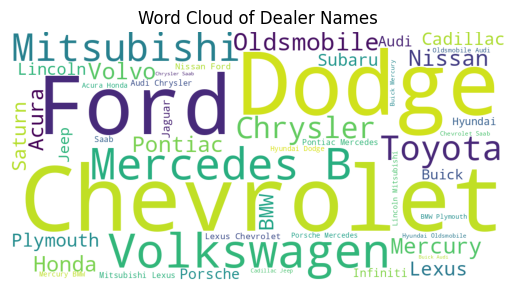

In [ ]:
wc = WordCloud(width = 1000, height = 500, background_color = 'white').generate(" ".join(i.split()[0] for i in mydata.Company))
plt.imshow(wc)
plt.axis('off')
plt.title('Word Cloud of Dealer Names')
plt.show()

Wordclouds are mostly used for visualizing texts for example, reviews. The bigger the word, the more frequently it occured. In our case, we are using the word cloud to check which car company was more popular. From above plot, we understand that the top 3 most popular car companies were:

1.  Chevrolet
2.  Dodge
3.  Ford



### Plot 22 - Violin Plot for Price ($) for each Engine and Transmission

In [ ]:
fig = px.violin(mydata, y = "Price ($)", x = "Engine", color = "Transmission", box = True, color_discrete_sequence = px.colors.qualitative.Set1, template = "plotly_dark")
fig.show()

Violin Plots can be used to visualize the distribution of any particular feature. From the above violin plot, we can clearly interpret that all the Auto transmission or Automatic cars sold, all have the same type of engine that is  Double-A Overhead Camshaft (DOHC), whereas all the manual cars sold have Overhead Camshaft (OHC) engine. When we analyze the price distribution for each engine and transmission, we understand that both the engine's have positively skewed distribution. The highest peak for DOHC engine indicates that a large number of customers bought cars below the median value (22.501K) which is also true for OHC engine. Customers prefered buying cheaper Manual OHC engine cars more than DOHC automatic cars. because for OHC, 75% of the customers bought cars below 29K, where as for DOHC, 75% of the customers bought cars below 31.5K.

### Plot 23 - Radar Chart for Minimum Price ($) of each Body Style and Engine

In [ ]:
d1 = pd.DataFrame(mydata.groupby(["Body Style", "Engine"])["Price ($)"].min()).reset_index()
fig = px.line_polar(d1, r = "Price ($)", theta = "Body Style", color = "Engine", line_close = True, color_discrete_sequence = px.colors.qualitative.Set2, template = "plotly_dark")
fig.update_traces(fill = 'tonext')
fig.show()

Line Polar charts in plotly which are known as radar charts can be used to compare 2 or more items based on some features. We are comparing the OHC and DOHC engine type based on the car body styles. For OHC, the cheapest Body Style of car sold is Hatchback. For DOHC, the cheapest Body Style of car sold is SUV.

### Plot 24 - Radar Chart for Maximum Price ($) of each Body Style and Engine

In [ ]:
d1 = pd.DataFrame(mydata.groupby(["Body Style", "Engine"])["Price ($)"].max()).reset_index()
fig = px.line_polar(d1, r = "Price ($)", theta = "Body Style", color = "Engine", line_close = True, color_discrete_sequence = px.colors.qualitative.Set2, template = "plotly_dark")
fig.update_traces(fill = 'tonext')
fig.show()

For all body styles of car, OHC engine type cars are more expensive than DOHC type cars. For OHC, the most expensive Body Style of car sold is Hardtop. For OHC, the most expensive Body Style of car sold is SUV.



## Expensive vs Cheapest

###Plot 25 - Bar Chart for most expensive and most cheapest car

In [ ]:
exp = mydata[mydata['Price ($)'] == mydata['Price ($)'].max()]
chp = mydata[mydata['Price ($)'] == mydata['Price ($)'].min()]
d = pd.merge(exp, chp, "outer")
fig = px.bar(d, x = "Company", y = "Price ($)", color = "Company", hover_data = ["Customer Name", "Gender", "Model", "Color"])
fig

*  The most expensive car sold was Pale White Chevrolet Malibu, bought by Antoine (Male). It was sold in 57.99K dollars.
*  The most cheapest car sold was Black Ford Taurus, bought by Sajid (Female). It was sold in 1200 dollars.

# Customer Segmentation

Customer Segmention is the process of grouping customers in different categories/clusters defined by their characteristics/behaviour of purchasing an item or by their features. Customer Segmentation can help us in knowing how a certain customer would behave according to their features. It is usefull, as we can create special offers for special types of customers. For our dataset, we are going to segment the customers according to their Annual Income and Price of the car they purchased. To perform customer segmentation on our data, we are using the KMeans ML method.

## K-Means

K-Means is an unsupervised (we don't know the target labels) Machine Learning algorithm. It helps in finding the ideal number of clusters. After finding k, the data-points are grouped togther based on their distance from each other.

In [ ]:
mydata1 = pd.read_csv("Car Sales.xlsx - car_data.csv")
data_cluster = mydata1.loc[: , ["Annual Income","Price ($)"]]

We have created a new dataset, data_cluster that has only 2 features "Annual Income" and "Price ($)".

### Plot 26 - Elbow Analysis

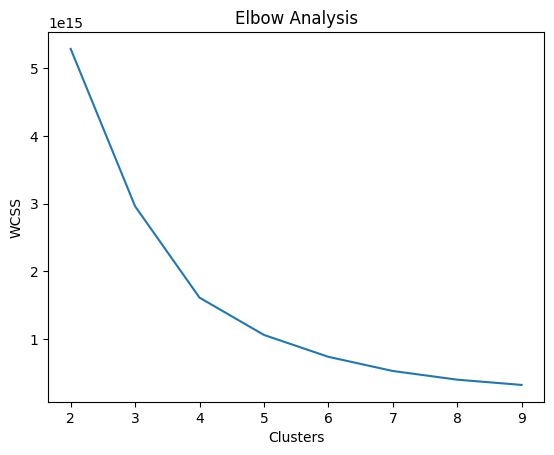

In [ ]:
wcss = []

for c in range(2, 10):
    kmeans = KMeans(n_clusters = c, random_state = 0)
    kmeans.fit(data_cluster)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Analysis')
plt.show()

Elbow method is one of the methods which uses k-means to find the optimal number of customers. Usually, the last dip / turning point is considered as the most ideal k. For our model, we are considering k to be 4. As it is a clear last dip in point.

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 1).fit(data_cluster)
cluster_pred = kmeans.labels_
s_avg = silhouette_score(data_cluster, cluster_pred)
sv = silhouette_samples(data_cluster, cluster_pred)
print("The Silhouette score is: ", s_avg)

The Silhouette score is:  0.6246619827756884


We created a K-Means clustering model, with number of clusters to be 4 and the random state as None. We then gave the data_cluster for the ML model to predict the clusters for it. After that we calculated the the silhouette score which calculates how similar is the data point to its cluster. It ranges from -1 and 1. If its closer to -1, that means the clusters are incorrectly assigned. If it is closer to 1, it means that the clusters are correctly assigned, and clearly distinguished. If it is closer to 0, it means they are overlapping. Our model has a silhouette score of 0.62. Which is a pretty decent score. It means that the clusters are appropriately assigned and distinguished but with a slight overlapping.

### Plot 27 - Clusters

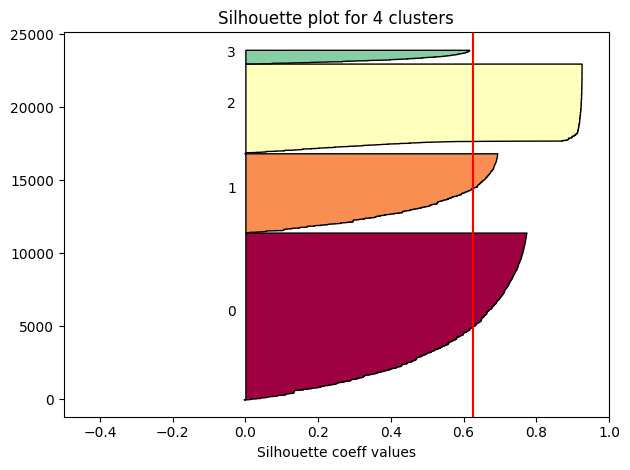

In [ ]:
fig, ax = plt.subplots()
y_l = 10

for i in range(4):

    cv = sv[cluster_pred == i]
    cv.sort()
    s = cv.shape[0]
    y_u = y_l + s

    ax.fill_betweenx(np.arange(y_l, y_u), 0, cv, facecolor = plt.cm.get_cmap("Spectral")(i / 4), edgecolor = 'black')
    ax.text(-0.05, y_l + 0.5 * s, str(i))
    y_l = y_u + 10

ax.set_title("Silhouette plot for 4 clusters")
ax.set_xlabel("Silhouette coeff values")

ax.axvline(x = s_avg, color = "red")

ax.set_xlim([-0.5, 1])
plt.tight_layout()
plt.show()

We are using the silhouette samples (sv) to plot and see the silhouette coefficient of each cluster. The red line is the silhouette averge score. Cluster 2 has the highest sihouette score, whereas Cluster 3 has the least silhouette score.

In [ ]:
data_clustered = data_cluster.assign(Cluster = pd.DataFrame(kmeans.labels_))
kmeans_grouped = data_clustered.groupby(['Cluster']).mean().round(1)
kmeans_grouped

Annual Income  Price ($)
Cluster                          
0             740983.3    28097.3
1            1515013.1    27952.7
2              59246.1    28013.2
3            3026383.2    29307.8

We are taking different labels of the clusters and storing it in cluster_no. data_clustered will then have a new feature called Cluster, which their respecitive cluster label. We are then grouping the data based on their clusters and then displaying the mean of each cluster, to understand how the behaviours of our customers and analyze on what basis were they grouped on.

we can analyze that we have 4 clusters but we can divide them to two separate Groups,

1.  Group 1 - Higher Earning Customers

     *   Group 1 includes Cluster 1 and Cluster 3.
     *   These customer have comparatively higher compared comapred to the customers from the other clusters.
     *   Cluster 3: This includes customers who averagely earn the highest income, And they also purchase most expensive cars.
     *   Cluster 1: This includes customers who averagely earn the 2nd highest income, And they purchase the cheapest cars (comapred to the rest).

1.  Group 2 - Lower Earning Customers

     *   Group 2 includes Cluster 0 and Cluster 2.
     *   These customer have comparatively lower income compared to the customers from the other clusters.

     *   Cluster 2: This includes customers who averagely earn the lowest income, And they purchase cars which are in moderate price range. According to their income, the car price is considered expensive.

     *   Cluster 0: This includes customers who averagely earn the 2nd lowest income, And they purchase cars whose prices are slightly above the average.


What we can conclude from the observations is that:

*  Rich people either tend to buy really expensive cars, probably for themselves, or averagely cars with low price. We have this biased mentality that rich people would love to spend their money easily. But in reality, rich people tend to preserve their money, and this can be proven by analyzing Cluster 1.

* Low income earning people would probably save a lot of money to fulfill their dream of buying averagely expensive cars, which can be proven by looking at cluster 2 and 0.


# KNN - Classifying Car Body Styles

K-Nearest-Neighbours is a supervised Machine Learning models, which is used to classify the data based on some characteristics or features. We want to create a KNN model which can classify the car Body Styles.

##Proportion of Car Body Styles

### Plot 28 - Pie chart for Body Styles

In [ ]:
count = dict(mydata["Body Style"].value_counts())
fig = px.pie(values = count.values(), names = count.keys(), color_discrete_sequence = px.colors.qualitative.Set2)
fig.update_layout(title = 'Proportion of Car Body Styles')
fig.show()

## Encoding and Droping Features

In [ ]:
mydata_enc = mydata.drop(["Car_id", "Date", "Dealer_No ", "Phone", "Customer Name", 'Engine', 'Dealer_Name'], axis = 1)
ce_ordinal = ce.OrdinalEncoder(cols = ['Gender', 'Company', 'Model', 'Transmission', 'Color', 'Body Style', 'Dealer_Region'])
mydata_enc = ce_ordinal.fit_transform(mydata_enc)
mydata_enc.head(5)

Gender  Annual Income  Company  Model  Transmission  Color  Price ($)  \
0       1          13500        1      1             1      1      26000   
1       1        1480000        2      2             1      1      19000   
2       1        1035000        3      3             2      2      31500   
3       1          13500        4      4             2      3      14000   
4       1        1465000        5      5             1      2      24500   

   Body Style  Dealer_Region  
0           1              1  
1           1              2  
2           2              3  
3           1              4  
4           3              5

We choose to drop the following features:

Car_id, Dealer_No, Customer Name, Phone, Dealer Name, Date -They are nominal features which would'nt benefit our model. As they have many unique values. Also, they dont impact the customers choice to buy a certan car body style
We dropped Engine, because it has high correlation with Transmission.

We encoded the categorical features and stored them in mydata_enc.
For Body Style: 1 - SUV, 2 - Passsenger, 3 - Hatchback, 4 - Hardtop, 5 - Sedan.

## KNN model

In [ ]:
x = mydata_enc.drop('Body Style', axis=1)
y = mydata_enc['Body Style']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 47)

sscalar = StandardScaler()
x_train = sscalar.fit_transform(x_train)
x_test = sscalar.fit_transform(x_test)

In X, we are storing the features/input for our model to classify y (Body /Style). We are performing a 65/35 train test split. One of the feature scaling methods called Standard Scaler has also been used on both training and testing input data so that our data can be uniformly evaluated.

### Plot 29 - Optimal number of K

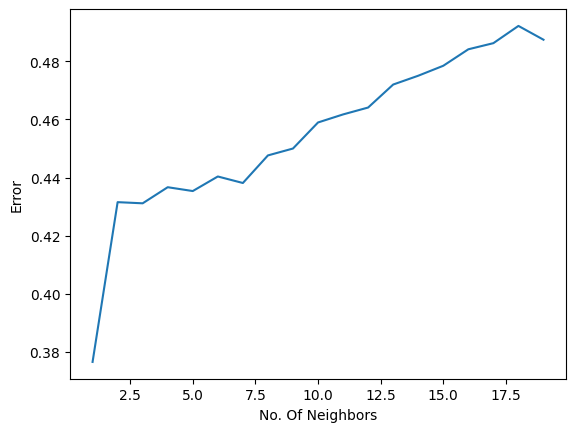

In [ ]:
error = []
for i in range(1,20):
    knnModel = KNeighborsClassifier(n_neighbors=i)
    knnModel.fit(x_train,y_train)
    predicted_y = knnModel.predict(x_test)
    error.append(np.mean(predicted_y != y_test))
import matplotlib.pyplot as plt

plt.plot(range(1,20),error)
plt.xlabel('No. Of Neighbors')
plt.ylabel('Error')
plt.show()

To choose the optimal number of K (no. of neighbors), we have plotted a chart to show the percentage of error for each number of neighbors. From the plot, the value of k around 2.5 has the least error, therefore, we have selected 3 number of neighbors.

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)
y_predicted = classifier.predict(x_test)

print("\nAccuracy Score: \n", accuracy_score(y_test, y_predicted))


Accuracy Score: 
 0.5688701606531472


We are creating a KNN model with 3 number of neighbors and training our model with x_train and then testing our model with x_test, and storing the predicted values in y_predicted. Next, we are printing the accuracy score for the predicted values and the actual values. Our accuracy score is 56%. Our KNN model predicted 56% of the data acccurately. Our model didn't perform that well. This could be due to imbalanced data. Also there is no linear correlation between our numeric data. Although KNN, can work well with Non-Linearly correlated data, we still would prefer to use a ML algorithm which works best with Non-Linear data. And that algorithm would be decision tree. (Plot 4 - Scatter plot shows the relationship between Annual Income and Price ($), we can easily understand that there is no linear relationship. Even the below heatmap easily depicts the same.)

###Plot 30 - Heatmap

<Axes: >

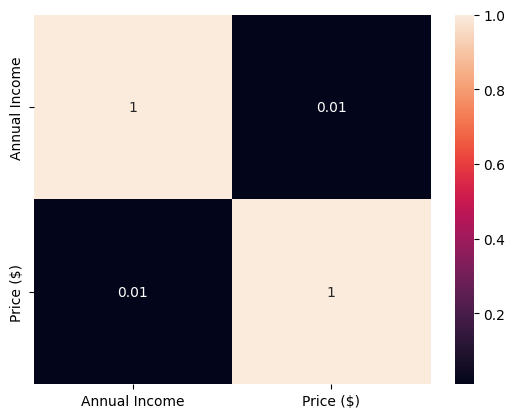

In [ ]:
sns.heatmap(mydata.loc[:, ['Annual Income', 'Price ($)']].corr(), annot = True)

Heatmaps are used to show how the features are correlated with each other. The correlation between Annual Income and Price is almost equal to 0.

### Plot 31 - Confusion Matrix

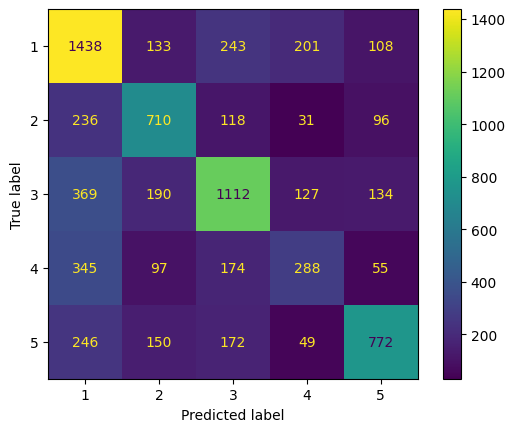

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [1, 2, 3, 4, 5])
cm_display.plot()
plt.show()

The above confusion matrix shows us that it predicted 1438 values of label 1 (SUV) correctly, 710 values of Passenger, 1112 values of Hatchback, 288 values of Hardtop and 772 values of Sedan correctly. It would be really incorrect of us to say that since higher values of Hatchback were predicted correctly than  Passenger, our model performed better for Hatchback because the total number of values for each label isn't the same. To solve this issue, we printed the percentage of correct predictions of each label using a line plot.

### Plot 32 - Line Chart for accuracy percentage

In [ ]:
l= []
j = 0
for i in cm:
  l.append(i[j]/sum(i) * 100)
  j +=1

fig = px.line(x = ["SUV", "Passenger", "Hatchback", "Hardtop", "Sedan"], y = l)
fig.show()

From the above line plot, we can cleary understand that our model predicted SUV very accurately compared to the rest.  And it predicted Hardtop the least accurately.


# Decision Tree

Decision Tree is a supervised Machine Learning algorithm. It is known for not using any equation to express the relationship between Independent and Dependent features. It is also a non linear model.

In [ ]:
x = mydata_enc.drop('Body Style', axis=1)
y = mydata_enc['Body Style']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state=0)

dt = DecisionTreeClassifier(random_state = 0)

dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print("\nAccuracy Score: \n", metrics.accuracy_score(y_test, y_pred))


Accuracy Score: 
 0.8891229918356597


Just like how we divided our features for KNN, we are doing the same thing for Decision Tree. The only difference is that we are not feature scaling our data, since decision tree isn't sensitive to different scales of data. We have created a decision tree model dt, with random state as 0, and we have given it the training data. We have tested the model with the testing data and stored the predicted values in y_pred. The accuracy score of our model is very good compared to the KNN. Our model has predicted 88.9% of our data accurately.

### Plot 33 - Accuracy Line Chart

In [ ]:
cm = confusion_matrix(y_test, y_pred)
l = []
j = 0
for i in cm:
  l.append(i[j]/sum(i) * 100)
  j +=1

fig = px.line(x = ["SUV", "Passenger", "Hatchback", "Hardtop", "Sedan"], y = l)
fig.show()

To analyze the accuracy for each body type, our decision tree model predicted Passenger and Sedan with 100% accuracy. Whereas the body style with the least accuracy was Hardtop. This could be due to the fact that Hardtop was purchased the least. So we had the least number of hardtop labels for our model to learn from.

# Conclusion

Finally, the journey of this notebook is coming to an end. Throughout this notebook, we performed different analysis on this car sales data with different types of charts. From Gender Analysis to Car Analysis, we saw different types of observations. For Gender Analysis, we observed that females are less interested in purchasing cars than males. Female customers also have slightly lower income than males, but that doesn't stop them from purchasing expensive cars.  For Dealer analysis, we observed that there 2 different groups of dealers. One having really number of customers, while the other having pretty low number of customers. But the top 5 dealers had very similar pattern of car sales throughout the year. Usually, the sales are pretty low in the beginning of the year, but towards the end of the year the sales increase a lot. We covered the reasons for such pattern in the dealer region analysis. Austin- Texas, had the highest total sales whereas Aurora - Colorado had the lowest total sales. A choropleth map of the US showed which states had the highest earning median income. In car analysis, we understood that certain transmission mode use certain engine only in our data. In customer segmentation, we observed that there were 4 different types of customers and explained the characteristics of each customer type. Since, our data is non linearly correlated, our KNN classification model didn't perform that well. On the other hand, the Decision Tree model performed pretty good compared to the KNN model.